In [1]:
# Import libraries

#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, Normalizer, FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

#models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgbm
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
train = pd.read_csv('/content/drive/MyDrive/Colabs/Competitions/Kaggle/DSN Bootcamp Qualification Hackathon Qualification/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colabs/Competitions/Kaggle/DSN Bootcamp Qualification Hackathon Qualification/data/test.csv')
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


#Data Cleaning

In [4]:
train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [5]:
train.fillna({'fuel_type': train['fuel_type'].mode()[0], 'accident': train['accident'].mode()[0], 'clean_title': train['clean_title'].mode()[0]}, inplace=True)
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [7]:
test.fillna({'fuel_type': test['fuel_type'].mode()[0], 'accident': test['accident'].mode()[0], 'clean_title': test['clean_title'].mode()[0]}, inplace=True)
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,Yes
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,Yes
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [8]:
test.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [9]:
train.drop('id', axis=1, inplace=True)
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# Exploratory Data Analysis

In [10]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns
cat_cols


Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

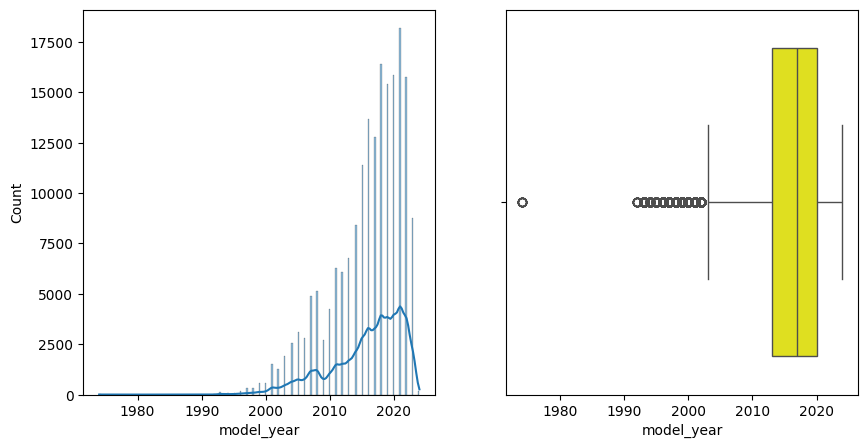

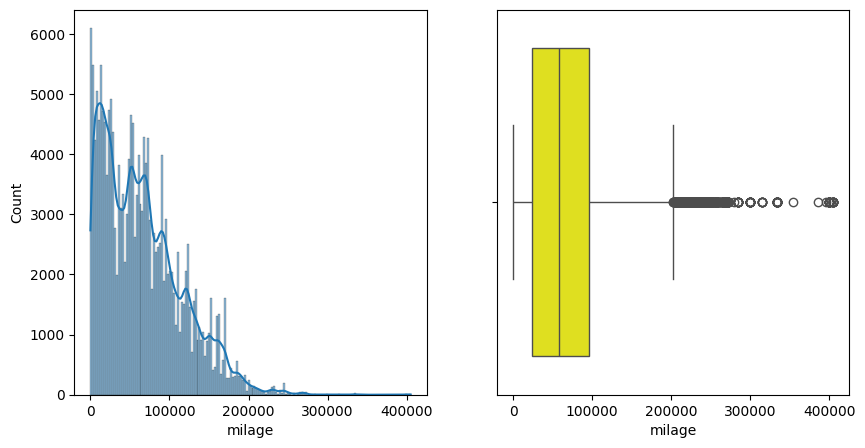

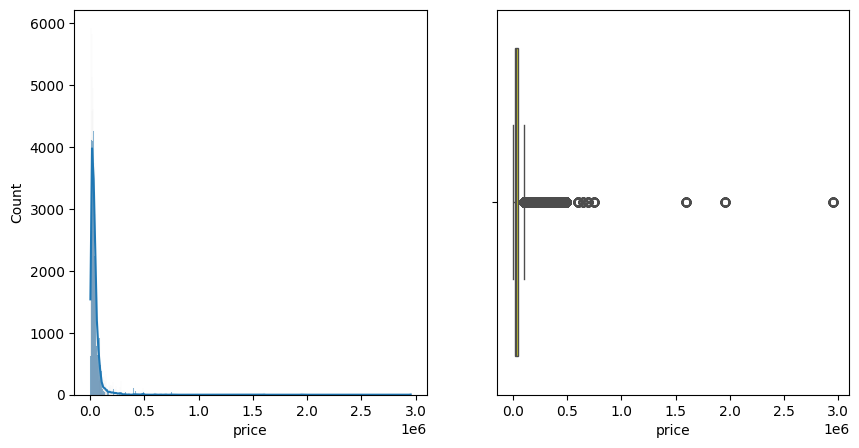

In [11]:
# ploting the distribution of numerical columns
for i in num_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(train[i], kde=True, ax=ax1)
  sns.boxplot(x=train[i], color='yellow', ax=ax2)
  plt.show()

In [12]:
cat_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

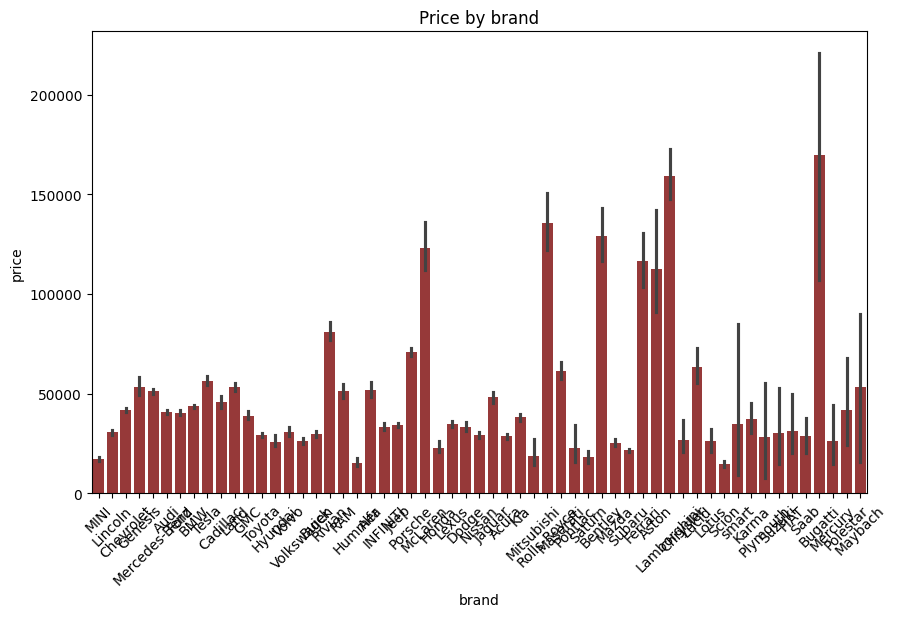

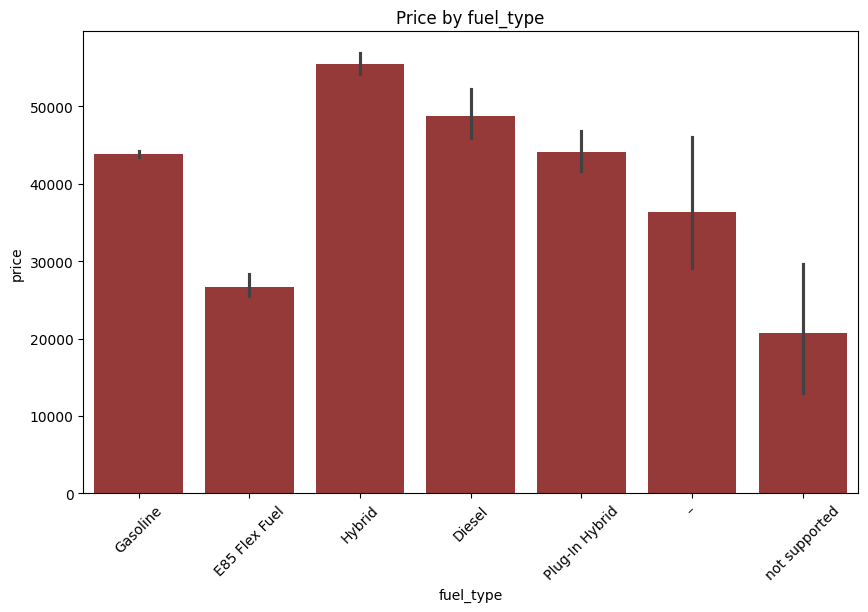

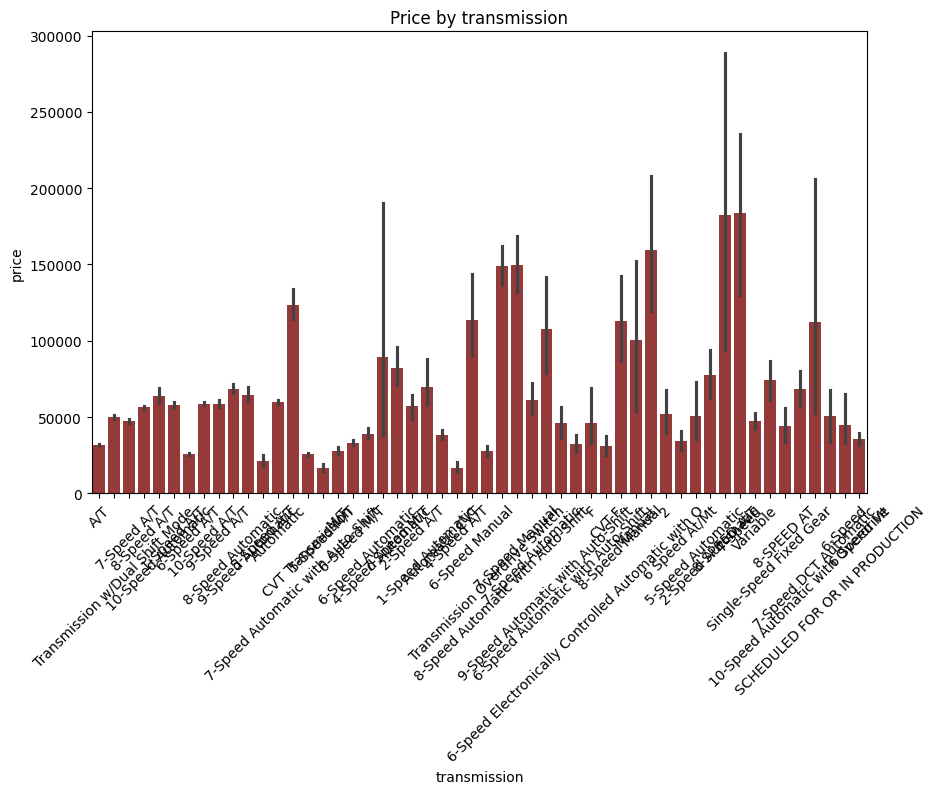

In [13]:
cat_cols2 = ['brand', 'fuel_type', 'transmission']
for col in cat_cols2:
  plt.figure(figsize=(10, 6))
  sns.barplot(x=col, y='price', data=train, color='brown')
  plt.title(f'Price by {col}')
  plt.xticks(rotation=45)
  plt.show()

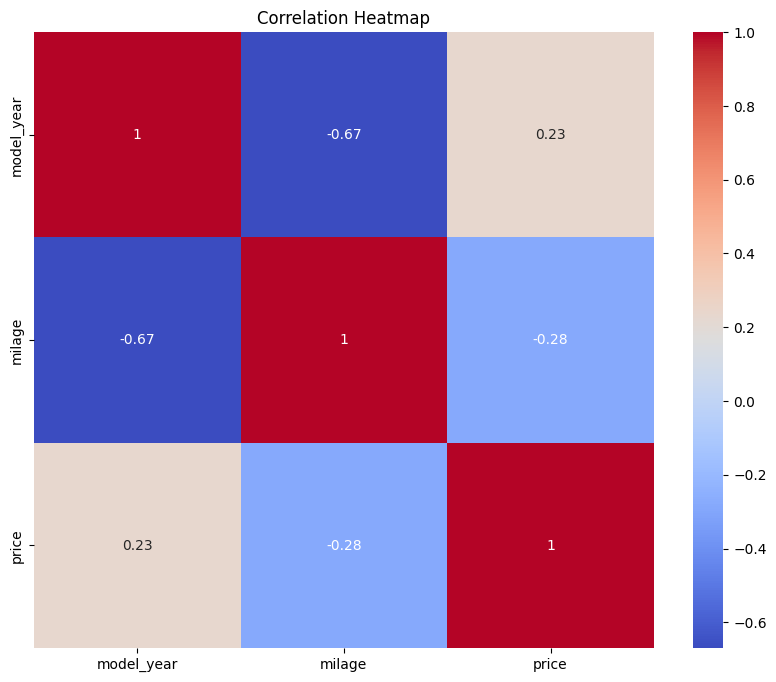

In [14]:
corr = train[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [15]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [16]:
for i in train.columns:
  print(f'{i}: {train[i].nunique()}')


brand: 57
model: 1897
model_year: 34
milage: 6651
fuel_type: 7
engine: 1117
transmission: 52
ext_col: 319
int_col: 156
accident: 2
clean_title: 1
price: 1569


In [17]:
train.drop('clean_title', axis=1, inplace=True)
test.drop('clean_title', axis=1, inplace=True)

In [18]:
ohe_features = ['brand', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']


num_cols3 = ['model_year', 'milage']

In [19]:
#score dataset and remove outliers
z_scores = np.abs(zscore(train[num_cols]))
no_outliers = (z_scores < 4).all(axis=1)
train[num_cols] = train[num_cols][no_outliers]
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,2007.0,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200.0
1,Lincoln,LS V8,2002.0,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999.0
2,Chevrolet,Silverado 2500 LT,2002.0,136731.0,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900.0
3,Genesis,G90 5.0 Ultimate,2017.0,19500.0,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000.0
4,Mercedes-Benz,Metris Base,2021.0,7388.0,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500.0


In [20]:
#score dataset and remove outliers
z_scores_test = np.abs(zscore(test[num_cols3]))
no_outliers_test = (z_scores_test < 4).all(axis=1)
test[num_cols3] = test[num_cols3][no_outliers_test]
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,188533,Land,Rover LR2 Base,2015.0,98000.0,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported
1,188534,Land,Rover Defender SE,2020.0,9142.0,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported
2,188535,Ford,Expedition Limited,2022.0,28121.0,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported
3,188536,Audi,A6 2.0T Sport,2016.0,61258.0,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported
4,188537,Audi,A6 2.0T Premium Plus,2018.0,59000.0,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported


#Feature Engineering

In [21]:
import re

def extract_engine_features(engine_string):
    hp_match = re.search(r'(\d+\.?\d*)HP', engine_string)
    liter_match = re.search(r'(\d+\.?\d*)L', engine_string)
    cylinder_match = re.search(r'(\d+)\s+Cylinder', engine_string)

    hp = float(hp_match.group(1)) if hp_match else None
    liter = float(liter_match.group(1)) if liter_match else None
    cylinder = int(cylinder_match.group(1)) if cylinder_match else None

    return hp, liter, cylinder

train[['horsepower', 'engine_size', 'num_cylinders']] = train['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))
test[['horsepower', 'engine_size', 'num_cylinders']] = test['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))

train['horsepower'] = pd.to_numeric(train['horsepower'], errors='coerce')
train['engine_size'] = pd.to_numeric(train['engine_size'], errors='coerce')
train['num_cylinders'] = pd.to_numeric(train['num_cylinders'], errors='coerce')

test['horsepower'] = pd.to_numeric(test['horsepower'], errors='coerce')
test['engine_size'] = pd.to_numeric(test['engine_size'], errors='coerce')
test['num_cylinders'] = pd.to_numeric(test['num_cylinders'], errors='coerce')

train['horsepower'].fillna(train['horsepower'].mean(), inplace=True)
train['engine_size'].fillna(train['engine_size'].mean(), inplace=True)
train['num_cylinders'].fillna(train['num_cylinders'].mean(), inplace=True)

test['horsepower'].fillna(test['horsepower'].mean(), inplace=True)
test['engine_size'].fillna(test['engine_size'].mean(), inplace=True)
test['num_cylinders'].fillna(test['num_cylinders'].mean(), inplace=True)

display(train.head())
display(test.head())

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders
0,MINI,Cooper S Base,2007.0,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200.0,172.0,1.6,4.0
1,Lincoln,LS V8,2002.0,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999.0,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002.0,136731.0,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900.0,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017.0,19500.0,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000.0,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021.0,7388.0,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500.0,208.0,2.0,4.0


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,horsepower,engine_size,num_cylinders
0,188533,Land,Rover LR2 Base,2015.0,98000.0,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,240.000000,2.000000,4.000000
1,188534,Land,Rover Defender SE,2020.0,9142.0,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,395.000000,3.000000,6.000000
2,188535,Ford,Expedition Limited,2022.0,28121.0,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,342.797283,3.500000,6.372479
3,188536,Audi,A6 2.0T Sport,2016.0,61258.0,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,342.797283,3.801503,6.372479
4,188537,Audi,A6 2.0T Premium Plus,2018.0,59000.0,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,252.000000,2.000000,4.000000


# Modelling

In [22]:
# Re-identify categorical and numerical columns after feature engineering
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
  train[col] = le.fit_transform(train[col])

train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,horsepower,engine_size,num_cylinders
0,31,495,2007.0,213000.0,2,116,38,312,71,1,4200.0,172.0,1.6,4.0
1,28,930,2002.0,143250.0,2,366,38,263,10,0,4999.0,252.0,3.9,8.0
2,9,1575,2002.0,136731.0,1,640,38,38,71,1,13900.0,320.0,5.3,8.0
3,16,758,2017.0,19500.0,2,863,49,29,14,1,45000.0,420.0,5.0,8.0
4,36,1077,2021.0,7388.0,2,259,23,29,10,1,97500.0,208.0,2.0,4.0


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
  test[col] = le.fit_transform(test[col])

test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,horsepower,engine_size,num_cylinders
0,188533,26,1388,2015.0,98000.0,2,326,16,302,10,1,240.000000,2.000000,4.000000
1,188534,26,1375,2020.0,9142.0,3,787,31,261,14,1,395.000000,3.000000,6.000000
2,188535,14,636,2022.0,28121.0,2,541,3,302,57,1,342.797283,3.500000,6.372479
3,188536,3,182,2016.0,61258.0,2,193,39,259,14,1,342.797283,3.801503,6.372479
4,188537,3,181,2018.0,59000.0,2,365,38,127,14,1,252.000000,2.000000,4.000000


In [25]:
lasso = Lasso(alpha=0.0005, random_state=42)

Enet = ElasticNet(alpha=0.005, l1_ratio=.9, random_state=42)

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15,
                                   min_samples_split=10, loss='huber', random_state=42)

xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

lightgbm = lgbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [28]:
train.isnull().sum()

,0
brand,0
model,0
model_year,1387
milage,1387
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [29]:
train.dropna(inplace=True)
test.fillna({'model_year': test['fuel_type'].median(), 'milage': test['milage'].median()}, inplace=True)

In [30]:
test2 = test.drop('id', axis=1)
test2.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,horsepower,engine_size,num_cylinders
0,26,1388,2015.0,98000.0,2,326,16,302,10,1,240.000000,2.000000,4.000000
1,26,1375,2020.0,9142.0,3,787,31,261,14,1,395.000000,3.000000,6.000000
2,14,636,2022.0,28121.0,2,541,3,302,57,1,342.797283,3.500000,6.372479
3,3,182,2016.0,61258.0,2,193,39,259,14,1,342.797283,3.801503,6.372479
4,3,181,2018.0,59000.0,2,365,38,127,14,1,252.000000,2.000000,4.000000


In [31]:
X = train.drop('price', axis=1)
y = train['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
def rmse(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print('RMSE: {:.6f}'.format(rmse))
  return rmse

In [34]:
score = rmse(lasso)

print(f'Lasso score: {score.mean()}, score std: {score.std()}')

RMSE: 30719.698043
Lasso score: 30719.69804257935, score std: 0.0


In [36]:
score = rmse(Enet)

print(f'Lasso score: {score.mean()}, score std: {score.std()}')

RMSE: 30719.741743
Lasso score: 30719.741742756894, score std: 0.0


In [37]:
score = rmse(lightgbm)

print(f'Lasso score: {score.mean()}, score std: {score.std()}')

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [38]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
  def __init__(self, models):
    self.models = models

  def fit(self, X, y):
    self.models_ = [clone(x) for x in self.models]

    for model in self.models_:
      model.fit(X, y)

  def predict(self, X):
    predictions = np.column_stack([model.predict(X) for model in self.models_])
    return np.mean(predictions, axis=1)

In [40]:
averaged_models = AveragingModels(models=(lasso, Enet, xgboost, lightgbm))

score = rmse(averaged_models)

print(f'Lasso score: {score.mean()}, score std: {score.std()}')

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [42]:
averaged_models.fit(X, y)
test_pred = averaged_models.predict(test2)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [43]:
submission_df = pd.DataFrame(test_pred, columns=['price'])
submission_df['id'] = test['id']
submission_df = submission_df[['id', 'price']]
submission_df.head()

,id,price
0,188533,19272.008400
1,188534,65000.383672
2,188535,53484.504367
3,188536,30169.484063
4,188537,33874.019091


In [45]:
submission_df.to_csv('last_dsn_submission.csv', index=False)